In [1]:
from keras import layers, models
from sklearn import preprocessing
from keras.models import Model
from keras.utils import np_utils 
from keras.callbacks import ModelCheckpoint
import tensorflow.keras as tk
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\lunaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# 데이터 불러오기
df = pd.read_csv("data.csv")

In [3]:
# 데이터 처리
# drop은 기본값이 행이므로 axis=1로써 컬럼 기준으로 열을 없앤다.
X = df.drop(['YM','M_10','F_50'], axis=1)
y = df[['M_10','F_50']]

In [6]:
from sklearn.model_selection import train_test_split
# random_state는 다시 랜덤값을 돌릴때 같은 값이 나올 수 있도록 함
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2021)


In [7]:
# 전체 데이터에서 0~1인 수치로 바꾸어주는 함수 객체 형성
scaler = preprocessing.MinMaxScaler()


In [8]:
# fit : 수치의 최대/최솟값을 구함, transform 앞의 fit을 기반으로 0~1값으로 변환
# fit_transform : 이 두 메소드를 한꺼번에 수행
X_train = scaler.fit_transform(X_train)
# 앞에서 fit을 사용했기 때문에 이후에는 fit을 사용하지 않고 transform만 사용한다.
X_test = scaler.transform(X_test)

In [9]:
# 변환을 통해 데이터프레임이 배열로 바뀜을 알 수 있다.
X_train[0]

array([0.21678611, 0.15532159, 0.19225507, 0.15081336, 0.12546834,
       0.07589648, 0.11975386, 0.30321922, 0.24998534, 0.17519308,
       0.24025207, 0.10076308, 0.05706011, 0.1082527 ])

In [10]:
# 샘플은 86개 변수 14개
X_train.shape


(86, 14)

In [11]:
from keras import optimizers

In [12]:
# 신경망 생성
# hidden layer : 21개
X_layer = layers.Input(14, name='input_X')
hidden = layers.Dense(21, activation='relu', name='hidden_layer')(X_layer)
output = layers.Dense(2, name='output_layer')(hidden)

model = Model(inputs=X_layer, outputs=output)


sgd = optimizers.SGD(lr=0.0001)

# 여기를 고쳐봅시다.
model.compile(loss='mse', optimizer='sgd')
model.summary()

TypeError: 'int' object is not iterable

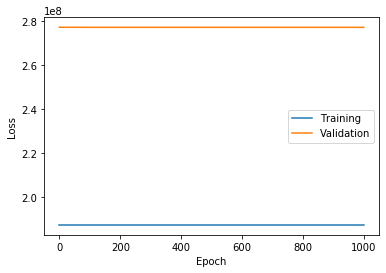

In [45]:
filepath = "/content/drive/MyDrive/Colab Notebooks/data"

checkpoint = ModelCheckpoint(
    'g:/model-{epoch:04d}.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, epochs=300, batch_size=300,
                    validation_split=0.2, verbose=2, callbacks=[checkpoint])
